#Import Library

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Import data

In [ ]:
train_data=pd.read_csv('./data/train_values.csv')
train_labels=pd.read_csv('./data/train_labels.csv')

#Data exploration

In [ ]:
print("# Train Labels: {}".format(train_labels.shape))
print("# Train Values: {}".format(train_values.shape))

# Train Labels: (260601, 2)
# Train Values: (260601, 39)


In [ ]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_values.isnull().sum() * 100 / len(train_values)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [ ]:
train_labels.describe(include=['object', "number"])

,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


In [ ]:
train_values.describe(include=['object', "number"])

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [ ]:
train_labels.dtypes

building_id     int64
damage_grade    int64
dtype: object

#PCA

In [ ]:
#merge label and training data in a dataset
df = train_values.merge(train_labels, how = 'inner', on = 'building_id')

In [ ]:
df.shape

(260601, 40)

In [ ]:
#get dummies for the non numerical data
pca = pd.get_dummies(df)

In [ ]:
pca.shape

(260601, 70)

In [ ]:
#heatmap to detect strong correlation
fig, ax = plt.subplots(figsize=(20,20))
corr = pca.corr()
sns.heatmap(corr,cmap="Blues",annot=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#keep only the values of the merged data
X = pca.values
X.shape

(260601, 70)

In [ ]:
#standardize the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
#apply the PCA the the standardized data
pca_70 = PCA(n_components=70, random_state=0)
pca_70.fit(X_scaled)
X_pca_70 = pca_70.transform(X_scaled)

In [ ]:
print("Variance explained by all 70 principal components =",sum(pca_70.explained_variance_ratio_*100))

Variance explained by all 70 principal components = 100.0


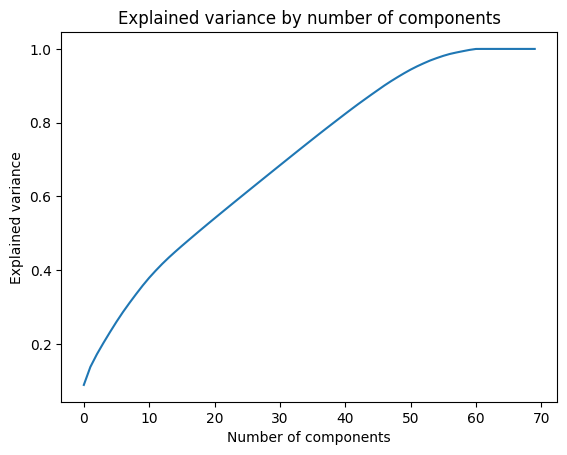

In [ ]:
#plot the variance
plt.plot(np.cumsum(pca_70.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title("Explained variance by number of components")
plt.savefig('elbow_plot.png',dpi=100)

no elbow point

In [ ]:
print("Variance explained by the First Principal component=", np.cumsum(pca_70.explained_variance_ratio_*100) [0])
print("Variance explained by the First 40 Principal components=", np.cumsum(pca_70.explained_variance_ratio_*100) [40])
print("Variance explained by the First 50 Principal components=", np.cumsum(pca_70.explained_variance_ratio_*100) [50])
print("Variance explained by the First 55 Principal components=", np.cumsum(pca_70.explained_variance_ratio_*100) [55])
print("Variance explained by the First 60 Principal components=", np.cumsum(pca_70.explained_variance_ratio_*100) [60])

Variance explained by the First Principal component= 8.86178745797823
Variance explained by the First 40 Principal components= 82.39203104733949
Variance explained by the First 50 Principal components= 94.38284610549746
Variance explained by the First 55 Principal components= 98.11805014843387
Variance explained by the First 60 Principal components= 99.99139580853348


In [ ]:
#apply the PCA for 99% of the variation and print the shape of the dataset with number of features preserved
pca_99 = PCA(n_components=0.99, random_state=0)
pca_99.fit(X_scaled)
X_pca_99 = pca_99.transform(X_scaled)
X_pca_99.shape

(260601, 58)

In [ ]:
print("Reduction to 58 features while keeping 99% of the variability in the data. This implies a reduction of", 100-(58/70*100) , "% of the dataset size")

Reduction to 58 features while keeping 99% of the variability in the data. This implies a reduction of 17.14285714285714 % of the dataset size


In [ ]:
#store the data in a new Dataframe with reduced dimmensio to preserve 99% of the variation
pca_new = pd.DataFrame(X_pca_99)
pca_new['label'] = df.building_id
pca_new.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,label
0,-1.406757,1.688214,0.186461,1.839380,-0.594475,-0.838058,-0.358257,0.729573,-1.336975,-1.700436,...,-0.424292,-0.901690,1.447866,0.617100,-0.089621,-0.133631,-0.425104,-0.237403,-0.084366,802906
1,-0.606437,0.248807,-1.410575,0.358429,1.487898,1.477195,-1.591125,0.936672,-0.250142,2.990650,...,-0.389105,0.171052,0.062008,0.034495,0.398360,0.087263,0.270351,-0.233440,-0.032744,28830
2,-0.904626,0.358000,0.070117,1.622792,-0.271556,-0.408053,-0.527515,-0.063003,-1.428303,-1.893303,...,0.199555,-0.432503,-0.221958,-0.185475,0.347296,-0.404877,-0.384290,0.101458,-0.130163,94947
3,-1.026472,-1.529606,1.020320,-0.380360,0.071626,0.271964,-0.437499,-2.139721,1.221611,-0.889686,...,1.220591,-1.204369,0.187920,-0.764402,1.155191,-0.379059,-0.299011,0.035717,-0.294604,590882
4,-0.437243,1.571836,1.186131,1.126621,-0.783485,0.247116,-0.993635,-1.311814,1.595800,0.178027,...,-0.357847,-1.089997,0.981866,0.653769,0.524956,0.486214,0.899085,-0.076145,-0.087937,201944


#Descriptive statistics

In [ ]:
#Change the damage grade column to type catgory
train_labels['damage_grade'] = train_labels['damage_grade'].astype('category')

train_labels.damage_grade.unique()

[3, 2, 1]
Categories (3, int64): [1, 2, 3]

In [ ]:
#Creating a categorial name for the damage_grade column
damage_map = {1: 'Low', 2: 'Medium', 3: 'High'}
train_labels['damage_grade'] = train_labels['damage_grade'].map(damage_map)
train_labels.damage_grade.unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low', 'Medium', 'High']

##Data distribution

<ipython-input-30-7e71a2f48c5b>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(x="damage_grade", data=train_labels, hue="damage_grade",


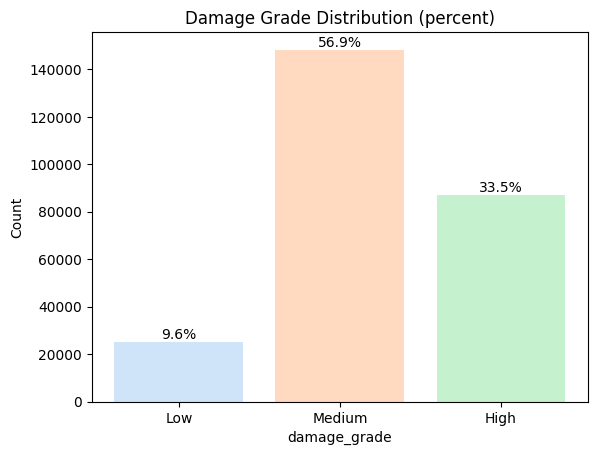

In [ ]:
# Define a standard color palette
colors = sns.color_palette("pastel")

#plot histogramm of distribution by damage grad in percent

sns.histplot(x="damage_grade", data=train_labels, hue="damage_grade",
             bins=3, shrink=.8, palette=colors, discrete=True,
             edgecolor="None", legend=False)
plt.title("Damage Grade Distribution (percent)")

#add percentage on each bar
total = len(train_labels)
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        percentage = f'{100 * height / total:.1f}%'
        plt.gca().text(p.get_x() + p.get_width() / 2, height, percentage,
                       ha='center', va='bottom')

plt.show()

##Distribution of damage by selected criteria

###Number of floors

In [ ]:
df = train_values.merge(train_labels, how = 'inner', on = 'building_id')

In [ ]:
# Merge x with the corresponding damage_grade from train_labels
data = pd.merge(df["count_floors_pre_eq"], train_labels, left_index=True, right_on="building_id")

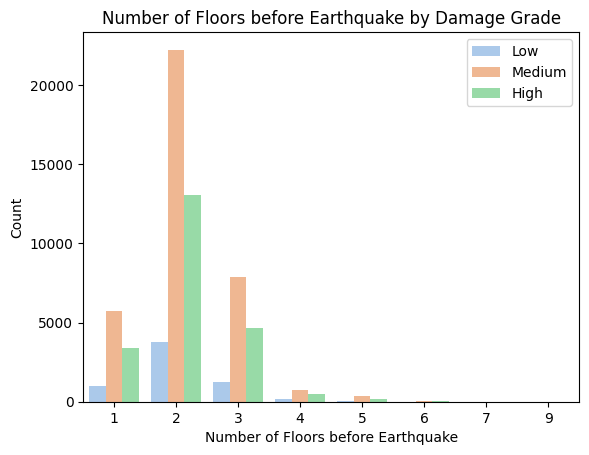

In [ ]:
#plot histogramm of number of floors before earthquake
sns.countplot(x=data["count_floors_pre_eq"], hue=train_labels["damage_grade"], palette=colors)
plt.ylabel("Count")
plt.xlabel("Number of Floors before Earthquake")
plt.title("Number of Floors before Earthquake by Damage Grade")

# Move labels to the right
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.legend(["Low", "Medium", "High"])
plt.show()

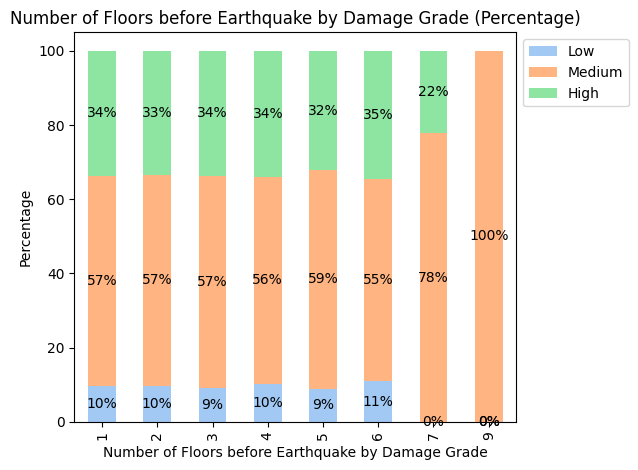

In [ ]:
# Calculate the percentage of each damage grade for each material category
cross_table = pd.crosstab(data["count_floors_pre_eq"], data["damage_grade"], normalize="index") * 100

# Plot the stacked bar chart with percentages
ax = cross_table.plot(kind="bar", stacked=True, color=colors)

plt.ylabel("Percentage")
plt.xlabel("Number of Floors before Earthquake by Damage Grade")
plt.title("Number of Floors before Earthquake by Damage Grade (Percentage)")

plt.legend(["Low", "Medium", "High"])

# Add percentage values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center')

# Move labels to the right
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()

###Age of building

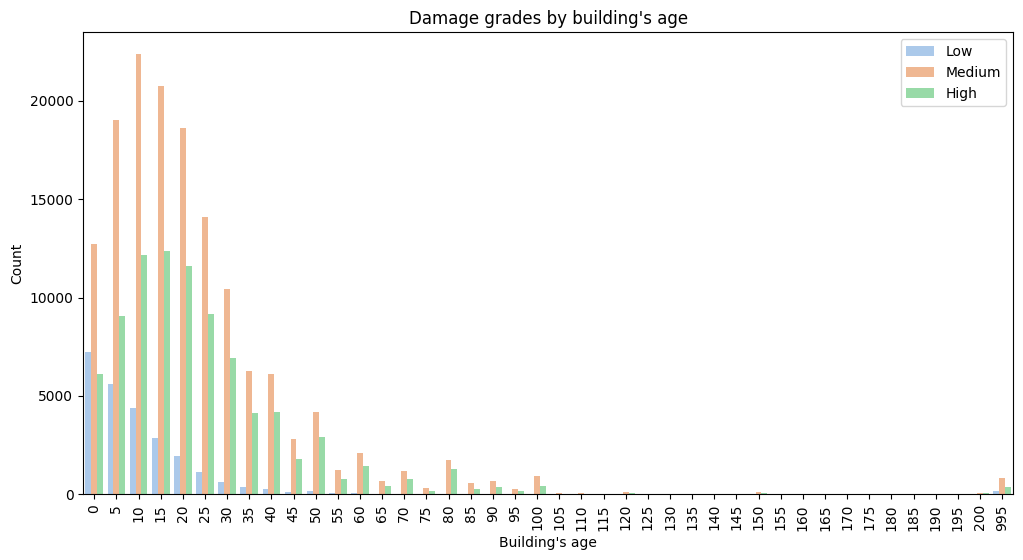

In [ ]:
#plot histogramm of age of building by damage grade
plt.figure(figsize=(12,6))
sns.countplot(x=train_values["age"],hue=train_labels["damage_grade"], palette=colors)
plt.ylabel("Count")
plt.xlabel("Building's age")
plt.xticks(rotation=90)
plt.title("Damage grades by building's age")
plt.legend(["Low", "Medium", "High"])
plt.show()

###Construction material

In [ ]:
#merge values and labels in one dataframe
df = train_values.merge(train_labels, how = 'inner', on = 'building_id')

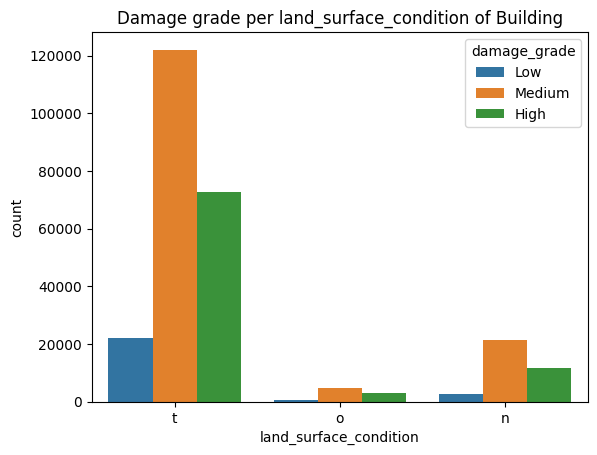

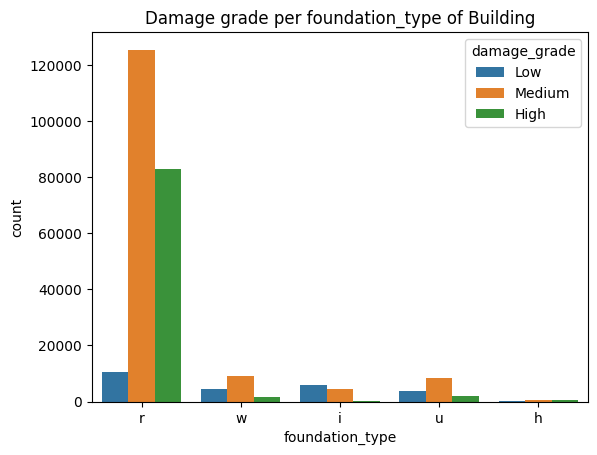

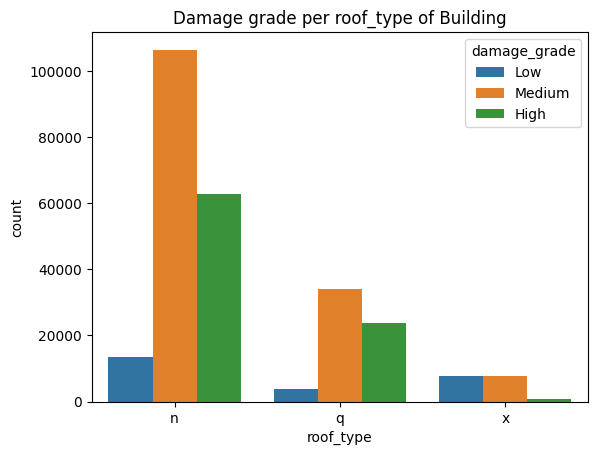

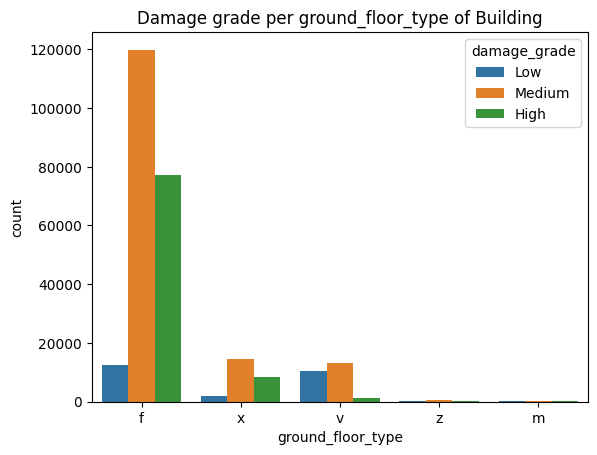

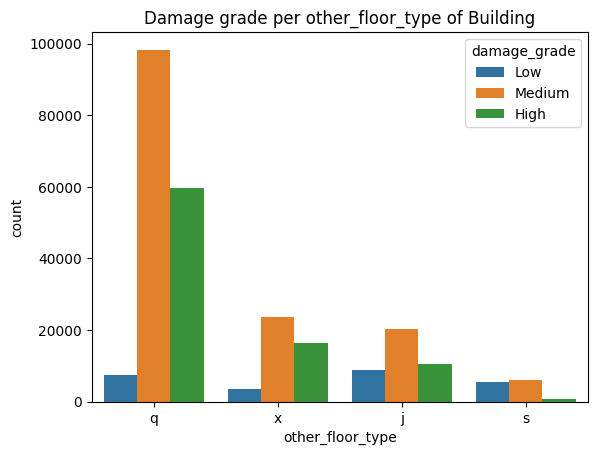

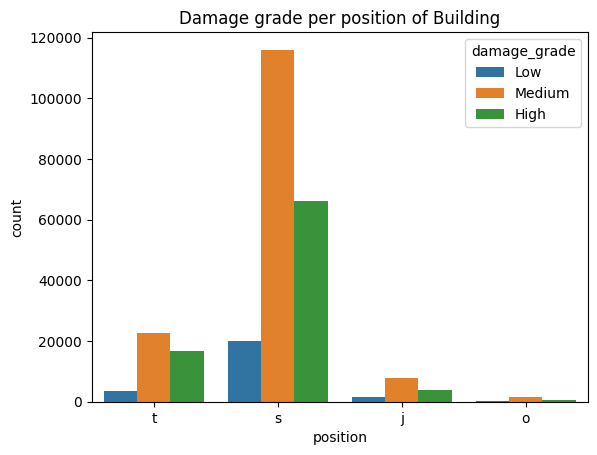

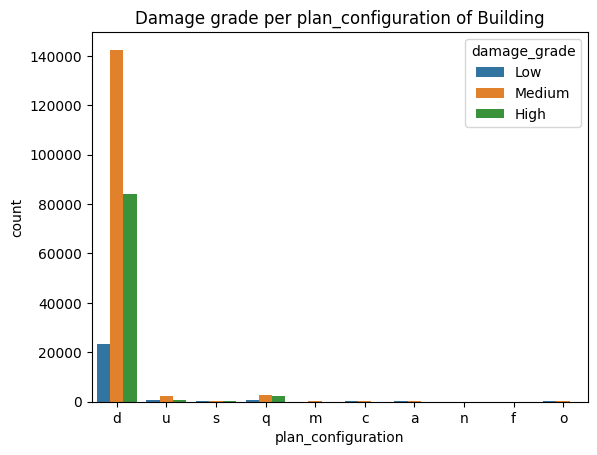

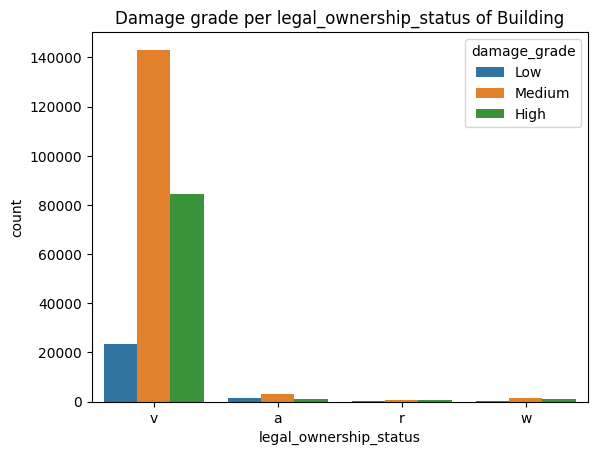

In [ ]:
#generate histogramme for each features in cat_cols list by damage grade
def plot_box(df, cols, col_x = 'damage_grade'):
    for  col in (cols):
    #for col in cols:
        sns.color_palette("pastel")
        sns.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade per ' + str(col)+' of Building')
        plt.show()


cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
plot_box(df, cat_cols)

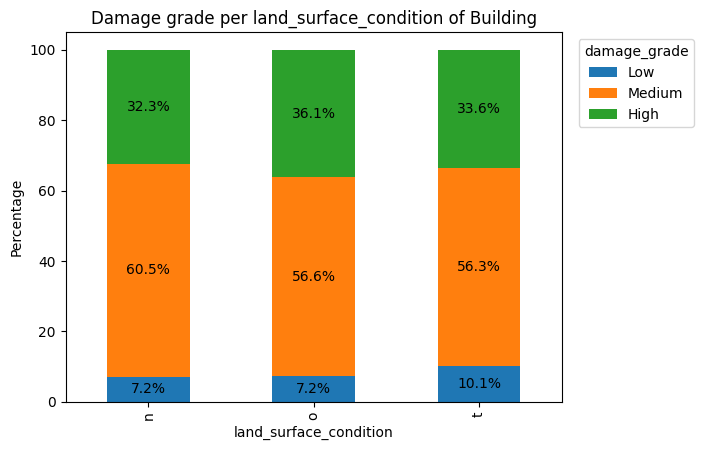

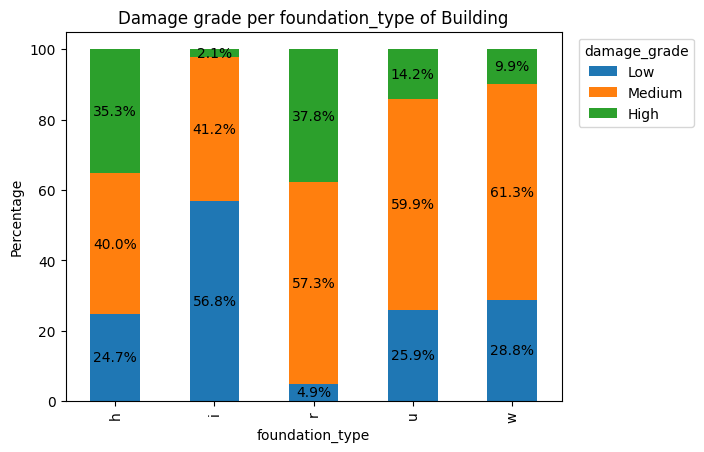

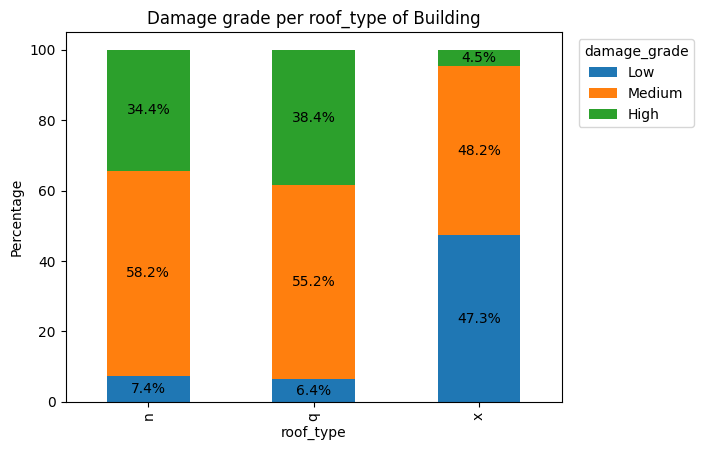

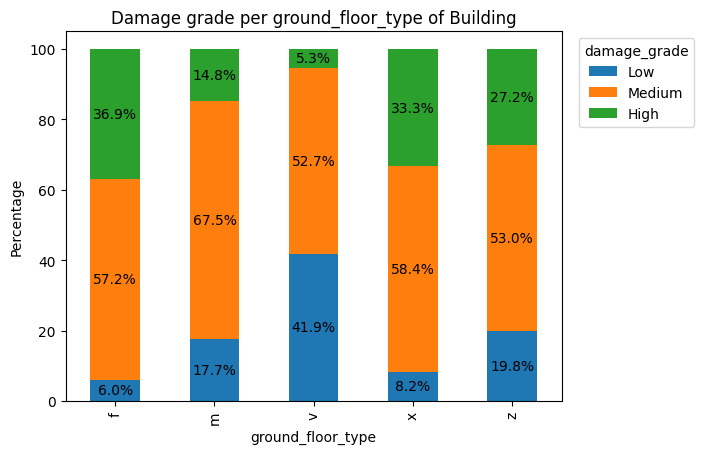

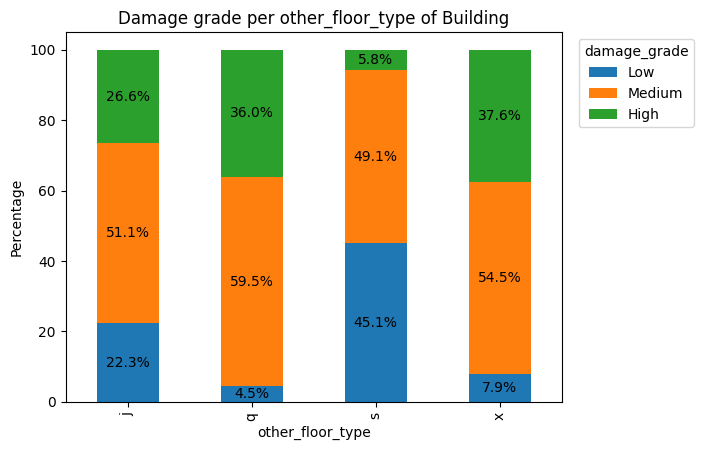

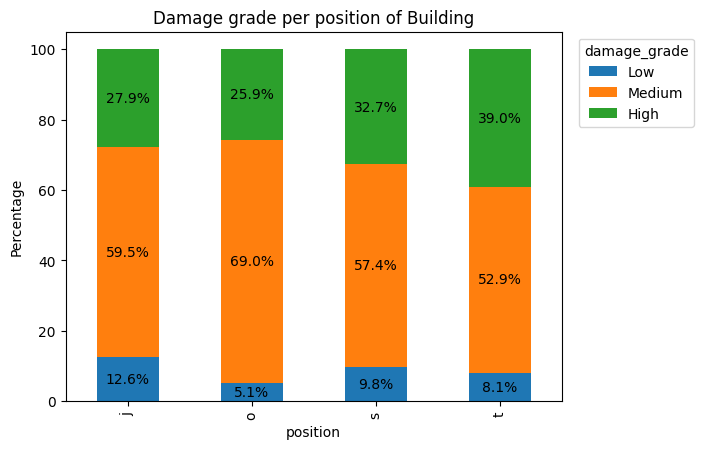

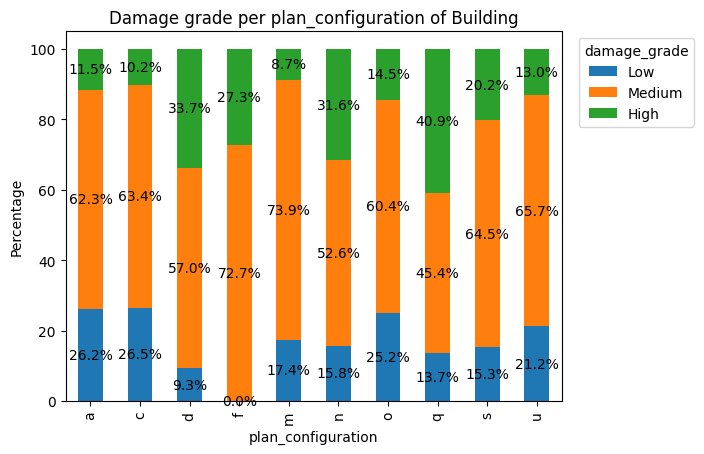

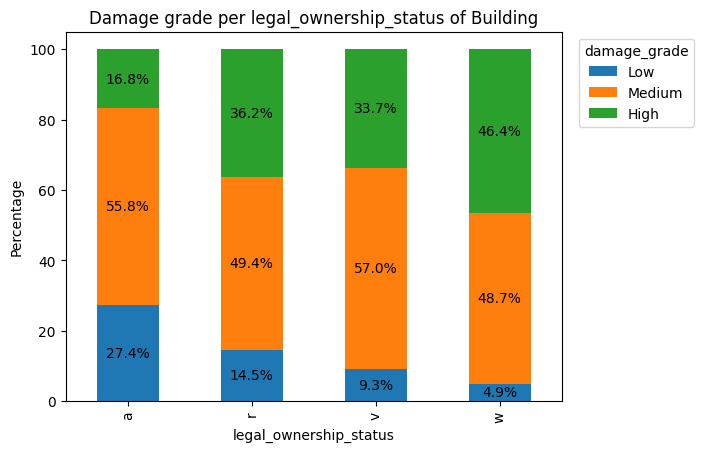

In [ ]:
#generate histogramme in percent for each features in cat_cols list by damage grade
def plot_box(df, cols, col_x='damage_grade'):
    total_count = len(df)  # Total count of records in the DataFrame
    for col in cols:
        sns.color_palette("pastel")
        df_grouped = df.groupby([col, col_x]).size().unstack()
        df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100  # Convert to percentage

        ax = df_grouped.plot(kind='bar', stacked=True)
        plt.xlabel(col)  # Set text for the x-axis
        plt.ylabel('Percentage')  # Set text for the y-axis
        plt.title('Damage grade per ' + str(col) + ' of Building')

        for patch in ax.patches:
            # Get percentage value and format it
            percentage = f'{patch.get_height():.1f}%'

            # Calculate the x and y position for annotation
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + patch.get_height() / 2

            # Add the percentage annotation to the plot
            ax.annotate(percentage, (x, y), ha='center', va='center')

            # Move the legend outside of the plot
            plt.legend(title=col_x, bbox_to_anchor=(1.02, 1), loc='upper left')


        plt.show()


cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
            'ground_floor_type', 'other_floor_type', 'position',
            'plan_configuration', 'legal_ownership_status']
plot_box(df, cat_cols)


###Superstructure type

In [ ]:
# Store in x the features about superstructures
x = train_values[["has_superstructure_adobe_mud",
                  "has_superstructure_mud_mortar_stone",
                  "has_superstructure_stone_flag",
                  "has_superstructure_cement_mortar_stone",
                  "has_superstructure_mud_mortar_brick",
                  "has_superstructure_cement_mortar_brick",
                  "has_superstructure_timber",
                  "has_superstructure_bamboo",
                  "has_superstructure_rc_non_engineered",
                  "has_superstructure_rc_engineered",
                  "has_superstructure_other"]]

# Create a new column "material" and assign category labels
new_df = x.loc[:, "material"] = x.idxmax(axis=1).str.replace("has_superstructure_", "").str.replace("_", " ").str.title()

<ipython-input-39-177da7aa08ec>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df = x.loc[:, "material"] = x.idxmax(axis=1).str.replace("has_superstructure_", "").str.replace("_", " ").str.title()


In [ ]:
new_df.head()

0           Adobe Mud
1    Mud Mortar Stone
2    Mud Mortar Stone
3    Mud Mortar Stone
4           Adobe Mud
dtype: object

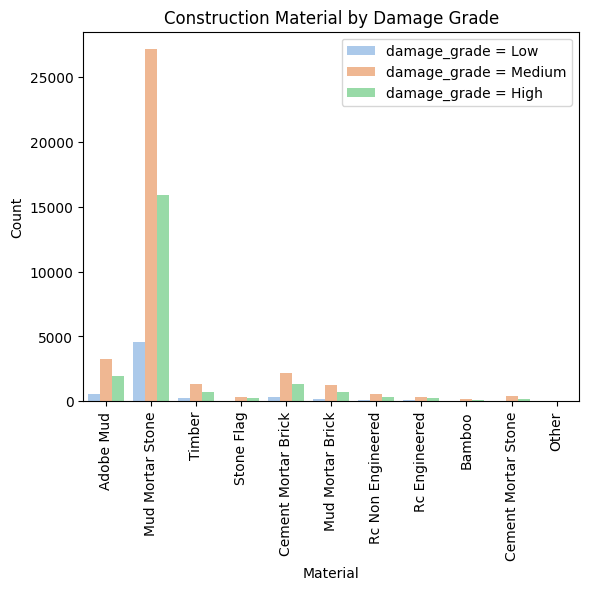

In [ ]:
# Merge x with the corresponding damage_grade from train_labels
data = pd.merge(x["material"], train_labels, left_index=True, right_on="building_id")

# Plot the count of damage_grade for each material category
sns.countplot(data=data, x="material", hue="damage_grade", palette=colors)

plt.ylabel("Count")
plt.xlabel("Material")
plt.title("Construction Material by Damage Grade")
plt.legend(["damage_grade = Low", "damage_grade = Medium", "damage_grade = High"])

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.show()

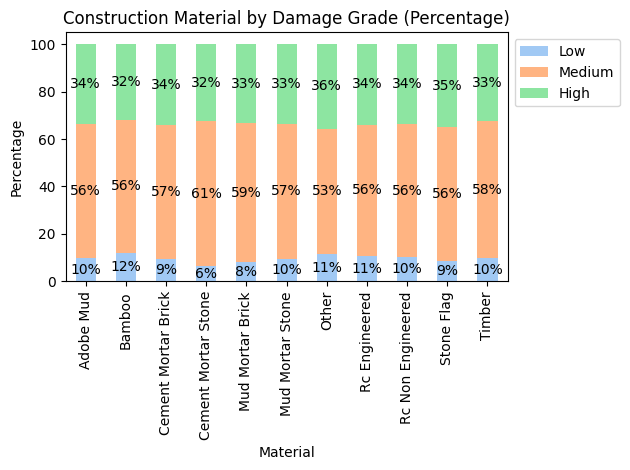

In [ ]:
# Calculate the percentage of each damage grade for each material category
cross_table = pd.crosstab(data["material"], data["damage_grade"], normalize="index") * 100

# Plot the stacked bar chart with percentages
ax = cross_table.plot(kind="bar", stacked=True, color=colors)

plt.ylabel("Percentage")
plt.xlabel("Material")
plt.title("Construction Material by Damage Grade (Percentage)")

plt.legend(["damage_grade = Low", "damage_grade = Medium", "damage_grade = High"])

# Add percentage values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center')

# Move labels to the right
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()

###Secondary use

####has secondary use

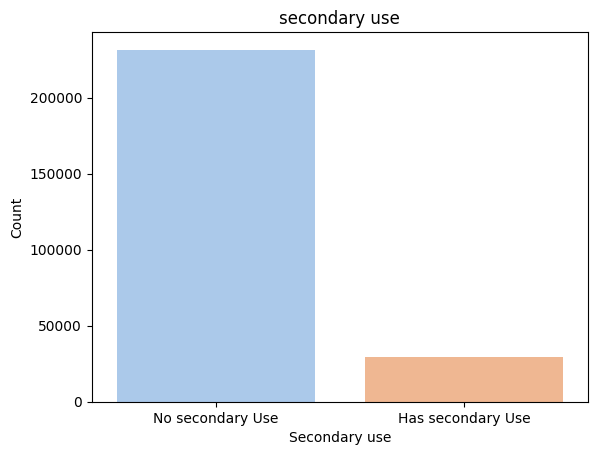

In [ ]:
# Plot the count of damage_grade for each material category
sns.countplot(data=train_values, x="has_secondary_use", palette=colors)

plt.ylabel("Count")
plt.xlabel("Secondary use")
plt.title("secondary use")

# Change x-axis labels
plt.xticks([0, 1], ["No secondary Use", "Has secondary Use"], rotation=0)

plt.show()

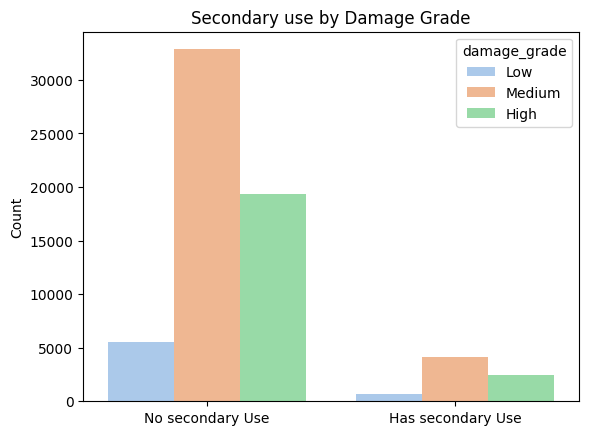

In [ ]:
# Merge x with the corresponding damage_grade from train_labels
data = pd.merge(train_values["has_secondary_use"], train_labels, left_index=True, right_on="building_id")

# Plot the count of damage_grade for each material category
sns.countplot(data=data, x="has_secondary_use", hue="damage_grade", palette=colors)

plt.ylabel("Count")
plt.xlabel(None)
plt.title("Secondary use by Damage Grade")
(["damage_grade = Low", "damage_grade = Medium", "damage_grade = High"])

# Change x-axis labels
plt.xticks([0, 1], ["No secondary Use", "Has secondary Use"], rotation=0)

plt.show()

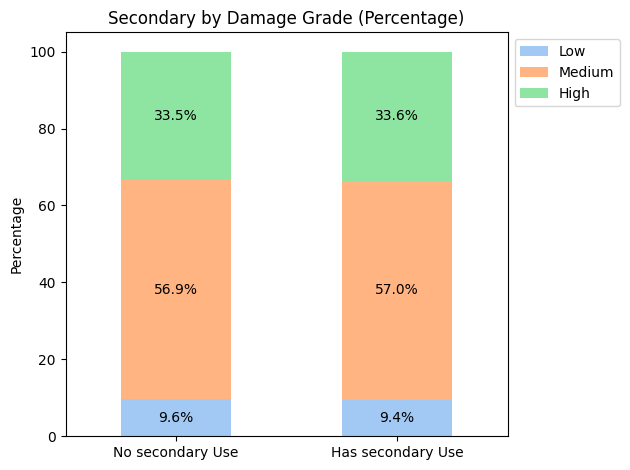

In [ ]:
# Merge x with the corresponding damage_grade from train_labels
data = pd.merge(train_values["has_secondary_use"], train_labels, left_index=True, right_on="building_id")

# Calculate the percentage of each damage grade for each material category
cross_table = pd.crosstab(data["has_secondary_use"], data["damage_grade"], normalize="index") * 100

# Plot the stacked bar chart with percentages
ax = cross_table.plot(kind="bar", stacked=True, color=colors)

plt.ylabel("Percentage")
plt.xlabel(None)
plt.title("Secondary by Damage Grade (Percentage)")

# Add percentage values on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.legend(["damage_grade = Low", "damage_grade = Medium", "damage_grade = High"])

# Change x-axis labels
plt.xticks([0, 1], ["No secondary Use", "Has secondary Use"], rotation=0)

# Move labels to the right
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

####type of secondary use

<ipython-input-46-70c453b51001>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["secondary use"] = x.idxmax(axis=1).str.replace("has_secondary_use_", "").str.replace("_", " ").str.title()


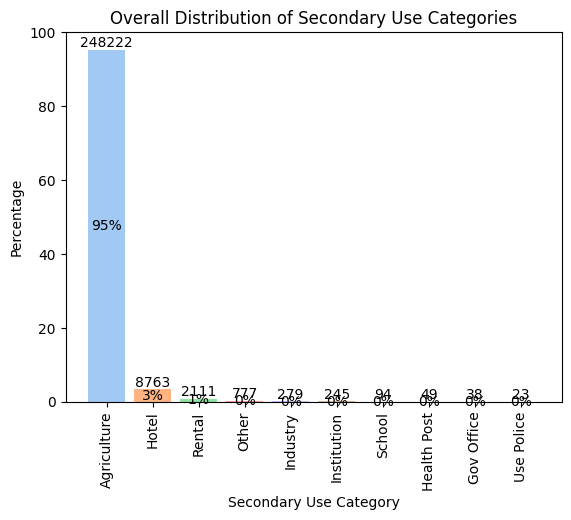

In [ ]:
# Store in x the features concerning secondary use
x = train_values[["has_secondary_use_agriculture",
                  "has_secondary_use_hotel",
                  "has_secondary_use_rental",
                  "has_secondary_use_institution",
                  "has_secondary_use_school",
                  "has_secondary_use_industry",
                  "has_secondary_use_health_post",
                  "has_secondary_use_gov_office",
                  "has_secondary_use_use_police",
                  "has_secondary_use_other"]]

# Create a new column "secondary use" and assign category labels
x["secondary use"] = x.idxmax(axis=1).str.replace("has_secondary_use_", "").str.replace("_", " ").str.title()

# Calculate the count of each secondary use category
secondary_use_counts = x["secondary use"].value_counts()

# Calculate the percentage of each secondary use category
secondary_use_percentages = (secondary_use_counts / secondary_use_counts.sum()) * 100

# Plot a bar chart for the overall distribution of secondary use categories
bars = plt.bar(secondary_use_percentages.index, secondary_use_percentages.values, color=colors)

plt.title("Overall Distribution of Secondary Use Categories")
plt.xlabel("Secondary Use Category")
plt.ylabel("Percentage")

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Add percentage and count values on each bar
for bar, count, percentage in zip(bars, secondary_use_counts, secondary_use_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.0f}%', ha='center', va='center')
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count:.0f}', ha='center', va='bottom')



plt.show()

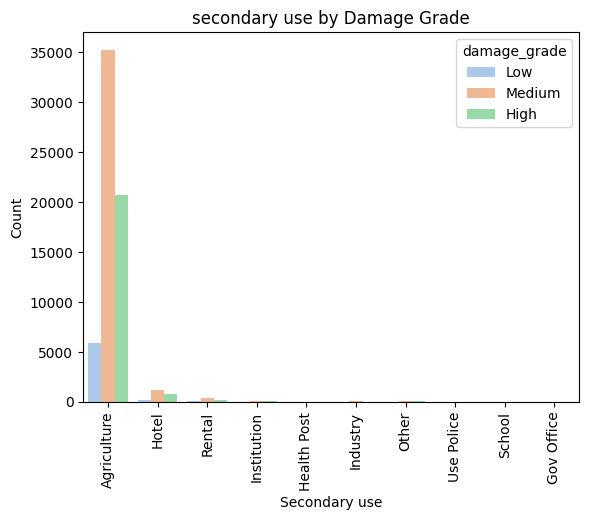

In [ ]:
# Merge x with the corresponding damage_grade from train_labels
data = pd.merge(x["secondary use"], train_labels, left_index=True, right_on="building_id")

# Plot the count of damage_grade for each material category
sns.countplot(data=data, x="secondary use", hue="damage_grade", palette=colors)

plt.ylabel("Count")
plt.xlabel("Secondary use")
plt.title("secondary use by Damage Grade")
(["damage_grade = Low", "damage_grade = Medium", "damage_grade = High"])

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.show()

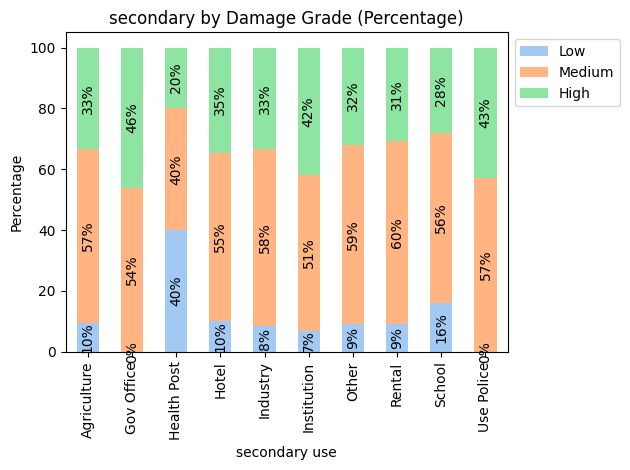

In [ ]:
# Calculate the percentage of each damage grade for each material category
cross_table = pd.crosstab(data["secondary use"], data["damage_grade"], normalize="index") * 100

# Plot the stacked bar chart with percentages
ax = cross_table.plot(kind="bar", stacked=True, color=colors)

plt.ylabel("Percentage")
plt.xlabel("secondary use")
plt.title("secondary by Damage Grade (Percentage)")

plt.legend(["damage_grade = Low", "damage_grade = Medium", "damage_grade = High"])

# Add percentage values on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', rotation=90)

# Move labels to the right
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()